In [ ]:
!pip install simpledbf

  Created wheel for simpledbf: filename=simpledbf-0.2.6-cp37-none-any.whl size=13793 sha256=456d04a8cc206fe62ead7d56a2e22a44eab523763193050b22a852cff102f8d1
  Stored in directory: /root/.cache/pip/wheels/72/dd/df/cdfb970a508ef9750ebb4b6e035a3410c3d62b5a6a91d2aafc
Successfully built simpledbf


In [ ]:
import shutil
import urllib.request as request
from contextlib import closing
import zipfile
import sys
import os
from pathlib import Path
import pandas as pd
from simpledbf import Dbf5
import platform
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#define a função de download
def download_ftp(url, savepath):
    with closing(request.urlopen(url)) as r:
        with open(savepath, 'wb') as f:
            shutil.copyfileobj(r, f)

root = Path(".")

In [ ]:
#Paulo criou a pasta aqui? 
dbf_save_folder = root / "SINASC_DBF"
csv_save_folder = root / "SINASC_CSV"

dbf_save_folder.mkdir(exist_ok=True)
csv_save_folder.mkdir(exist_ok=True)

In [ ]:
SINASC_URL = "http://svs.aids.gov.br/dantps/centrais-de-conteudos/dados-abertos/sinasc/DNBR20DA.zip"

In [ ]:
print("Downloading", SINASC_URL.split("/")[-1])
save_path = dbf_save_folder / SINASC_URL.split("/")[-1]
download_ftp(SINASC_URL, save_path)

In [ ]:
with zipfile.ZipFile(save_path, 'r') as zip_ref:
    zip_ref.extractall(dbf_save_folder)

In [ ]:
!ls SINASC_DBF/

DNBR20DA.DBF  DNBR20DA.zip


In [ ]:
filepath = (dbf_save_folder/'DNBR20DA.DBF') #('C:/Users/spereira/OneDrive - Padtec/Documents/Unicamp/Projeto/DNBR20DA.DBF')
dbf = Dbf5(filepath)
dbf.to_csv(csv_save_folder/'DNBR20DA.csv')

In [ ]:
!ls SINASC_CSV/

DNBR20DA.csv


In [ ]:
filepath = Path(csv_save_folder/'DNBR20DA.csv')
df = pd.read_csv(filepath)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CODINST,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,OPORT_DN,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,MPR4113700001,1,7758391.0,411370,1,35.0,2.0,5.0,111415.0,1.0,0.0,411370,5.0,1.0,2.0,4.0,16062020,730.0,1,9.0,10.0,4.0,3000.0,2.0,1092020,NaN,20200035.0,3.2.00,4092020.0,80,17,3072020,841.0,411370.0,41,5.0,NaN,8111984.0,4.0,1.0,0.0,1.0,37.0,NaN,38.0,2.0,9.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,16062020.0,8.0,0.0,1,1.0,5,1,5
1,MPR4113700001,1,7758391.0,411370,1,33.0,2.0,5.0,331205.0,1.0,0.0,411370,5.0,1.0,2.0,4.0,16062020,1941.0,1,9.0,10.0,1.0,3340.0,2.0,1092020,NaN,20200035.0,3.2.00,4092020.0,80,17,3072020,841.0,412840.0,41,5.0,NaN,4101986.0,1.0,1.0,0.0,1.0,38.0,NaN,40.0,2.0,10.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,17062020.0,8.0,0.0,1,1.0,5,1,5
2,MPR4113700001,1,7758391.0,411370,1,35.0,4.0,5.0,111415.0,1.0,0.0,411370,5.0,1.0,1.0,4.0,16062020,2153.0,1,10.0,10.0,1.0,3470.0,2.0,30072020,NaN,20200031.0,3.2.00,7082020.0,52,17,3072020,841.0,411370.0,41,5.0,NaN,14021985.0,1.0,1.0,1.0,0.0,32.0,NaN,39.0,2.0,9.0,2.0,1.0,1.0,3.0,1.0,2.0,3.0,16062020.0,8.0,0.0,1,1.0,4,1,5
3,MPR4113700001,1,2579391.0,411370,1,17.0,5.0,5.0,999992.0,0.0,0.0,411370,5.0,1.0,1.0,4.0,16062020,2155.0,2,9.0,10.0,1.0,2660.0,2.0,30072020,NaN,20200031.0,3.2.00,7082020.0,52,17,3072020,841.0,411370.0,41,5.0,NaN,2112002.0,1.0,0.0,0.0,0.0,NaN,NaN,38.0,2.0,7.0,3.0,1.0,1.0,3.0,1.0,5.0,0.0,18062020.0,8.0,0.0,1,1.0,2,0,5
4,MPR4113700001,1,2579391.0,411370,1,23.0,5.0,3.0,999992.0,1.0,0.0,411370,5.0,1.0,2.0,4.0,16062020,924.0,2,9.0,10.0,1.0,3610.0,2.0,1092020,NaN,20200035.0,3.2.00,4092020.0,80,17,3072020,841.0,411370.0,41,2.0,5.0,16031997.0,1.0,1.0,0.0,1.0,NaN,NaN,40.0,2.0,11.0,2.0,1.0,1.0,1.0,1.0,5.0,0.0,18062020.0,3.0,0.0,1,1.0,5,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687646,EDF5300100002,1,3018520.0,530010,1,32.0,2.0,5.0,NaN,1.0,0.0,530010,5.0,1.0,2.0,3.0,28122020,2307.0,2,10.0,10.0,4.0,2915.0,2.0,23022021,NaN,20210019.0,3.2.01,24022021.0,58,58,24022021,853.0,530010.0,53,4.0,NaN,10031988.0,4.0,1.0,1.0,0.0,NaN,11042020.0,37.0,8.0,6.0,1.0,1.0,2.0,9.0,1.0,NaN,3.0,28122020.0,7.0,0.0,1,1.0,3,1,4
2687647,EDF5300100002,1,3018520.0,530010,1,31.0,2.0,5.0,NaN,1.0,1.0,530010,5.0,1.0,2.0,3.0,30122020,1501.0,2,8.0,9.0,4.0,2955.0,2.0,23022021,NaN,20210019.0,3.2.01,24022021.0,56,56,24022021,853.0,530010.0,53,5.0,NaN,19011989.0,4.0,2.0,0.0,1.0,NaN,8042020.0,38.0,8.0,6.0,1.0,1.0,2.0,1.0,1.0,NaN,3.0,30122020.0,8.0,0.0,1,1.0,5,1,4
2687648,EDF5300100002,1,3018520.0,530010,1,34.0,2.0,5.0,NaN,0.0,0.0,530010,5.0,1.0,1.0,4.0,30122020,2115.0,1,9.0,10.0,4.0,3230.0,2.0,23022021,NaN,20210019.0,3.2.01,24022021.0,56,56,24022021,853.0,530010.0,53,5.0,NaN,24011986.0,4.0,0.0,0.0,0.0,NaN,3042020.0,39.0,8.0,9.0,2.0,1.0,2.0,3.0,1.0,NaN,4.0,30122020.0,8.0,0.0,1,1.0,1,0,5
2687649,EDF5300100002,1,5717515.0,530010,1,24.0,9.0,4.0,999992.0,1.0,0.0,530010,5.0,1.0,1.0,4.0,31122020,1133.0,2,9.0,10.0,4.0,3285.0,2.0,23022021,NaN,20210019.0,3.2.01,24022021.0,55,55,24022021,853.0,530010.0,53,3.0,3.0,22071996.0,4.0,1.0,1.0,0.0,NaN,20032020.0,41.0,8.0,7.0,1.0,1.0,2.0,3.0,2.0,2.0,4.0,31122020.0,6.0,0.0,1,1.0,3,1,5


In [ ]:

cols = ["DTNASC", "QTDFILVIVO","QTDFILMORT", "IDADEMAE", "RACACOR", "CODMUNNASC", "ESTCIVMAE", "ESCMAE", "PARTO", "IDANOMAL", "GESTACAO"]
df = pd.read_csv(filepath, usecols=cols)

In [ ]:
df

,CODMUNNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,GESTACAO,PARTO,DTNASC,RACACOR,IDANOMAL
0,411370,35.0,2.0,5.0,1.0,0.0,5.0,2.0,16062020,4.0,2.0
1,411370,33.0,2.0,5.0,1.0,0.0,5.0,2.0,16062020,1.0,2.0
2,411370,35.0,4.0,5.0,1.0,0.0,5.0,1.0,16062020,1.0,2.0
3,411370,17.0,5.0,5.0,0.0,0.0,5.0,1.0,16062020,1.0,2.0
4,411370,23.0,5.0,3.0,1.0,0.0,5.0,2.0,16062020,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2687646,530010,32.0,2.0,5.0,1.0,0.0,5.0,2.0,28122020,4.0,2.0
2687647,530010,31.0,2.0,5.0,1.0,1.0,5.0,2.0,30122020,4.0,2.0
2687648,530010,34.0,2.0,5.0,0.0,0.0,5.0,1.0,30122020,4.0,2.0
2687649,530010,24.0,9.0,4.0,1.0,0.0,5.0,1.0,31122020,4.0,2.0


##Verifica dados faltantes

In [ ]:
#conta o tamano total de dataset
df.shape

(2687651, 11)

In [ ]:
#verifica a quantidade de dados faltantes
faltantes = df.isnull().sum()
print(faltantes)

CODMUNNASC         0
IDADEMAE          24
ESTCIVMAE      16477
ESCMAE         17442
QTDFILVIVO     72307
QTDFILMORT    108032
GESTACAO       40297
PARTO           3353
DTNASC             0
RACACOR        70383
IDANOMAL       21417
dtype: int64


Verifica a quantidade de dados faltantes

In [ ]:
def missing_values(x):
  missing_per = np.isnan(x).mean()
  return "{:.2f}%".format(missing_per * 100)

df.apply(missing_values, axis=0)

CODMUNNASC    0.00%
IDADEMAE      0.00%
ESTCIVMAE     0.61%
ESCMAE        0.65%
QTDFILVIVO    2.69%
QTDFILMORT    4.02%
GESTACAO      1.50%
PARTO         0.12%
DTNASC        0.00%
RACACOR       2.62%
IDANOMAL      0.80%
dtype: object

Devido a % ser muito baixa podemos dropar os dados. Umas das variáveis importantes que é a qtdade de nascidos vivos, está em 2% mas podemos no dataset full esse número é menor que 0% 

In [ ]:
df = df.dropna()

df.shape

(2452372, 11)

## Qualidade dos dados 
###Verifica erros de registro, valores discrepantes e Inconsistências

In [ ]:
#Preciso colocar em um array e fazer a substituição no dataset.

from datetime import datetime
d = datetime.strptime('8122016', '%d%m%Y')
print(d.strftime('%Y-%m-%d'))

2016-12-08


In [ ]:
df.dtypes

CODMUNNASC      int64
IDADEMAE      float64
ESTCIVMAE     float64
ESCMAE        float64
QTDFILVIVO    float64
QTDFILMORT    float64
GESTACAO      float64
PARTO         float64
DTNASC          int64
RACACOR       float64
IDANOMAL      float64
dtype: object

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CODMUNNASC,2687651.0,3.191648e+05,9.945906e+04,110001.0,260120.0,320530.0,355030.0,530010.0
IDADEMAE,2687627.0,2.721625e+01,6.764641e+00,8.0,22.0,27.0,32.0,99.0
ESTCIVMAE,2671174.0,2.146253e+00,1.549225e+00,1.0,1.0,2.0,2.0,9.0
ESCMAE,2670209.0,4.072502e+00,7.672206e-01,1.0,4.0,4.0,4.0,9.0
QTDFILVIVO,2615344.0,1.036805e+00,1.327606e+00,0.0,0.0,1.0,2.0,99.0
QTDFILMORT,2579619.0,2.562010e-01,7.361529e-01,0.0,0.0,0.0,0.0,99.0
GESTACAO,2647354.0,4.885066e+00,4.538707e-01,1.0,5.0,5.0,5.0,9.0
PARTO,2684298.0,1.573614e+00,4.959835e-01,1.0,1.0,2.0,2.0,9.0
DTNASC,2687651.0,1.574457e+07,8.781626e+06,1012020.0,8072020.0,16022020.0,23092020.0,31122020.0
RACACOR,2617268.0,2.845942e+00,1.422553e+00,1.0,1.0,4.0,4.0,5.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f090fdbedd0>,
      dtype=object)

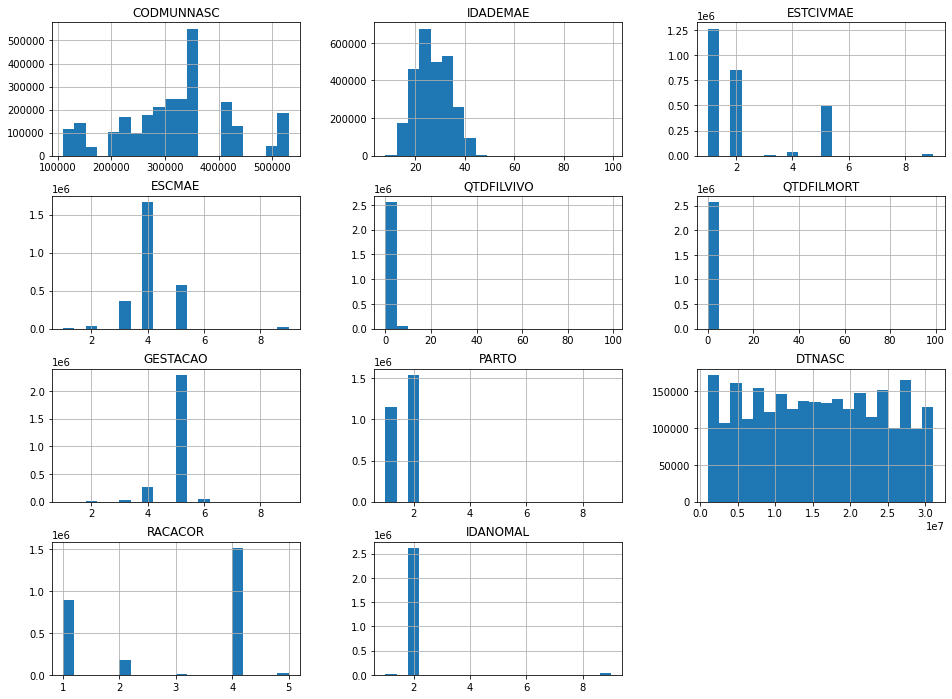

In [ ]:
plt.figure(figsize=(16, 12))

df.hist(ax=plt.gca(), bins=20)

In [ ]:
#charles é interessante usar esses que nasceram com 22 a 27 semanas? Nasceu vivo mas será que sobreviveu?